In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape


In [4]:
df = pd.read_csv('SVM Latest Task/Summer_SVM_8x8_-1_vs_0.csv')

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,2.663022,-0.396155,1.369795,-0.097585,0.741804,0.090171,0.198019,0.001707,-1.666805,0.352134,...,0.010282,0.003952,0.006375,0.000124,-0.000792,0.001868,37.0,25.0,123.0,0.0
1,2.898982,0.014663,1.530673,0.046265,0.752819,-0.006802,0.159900,-0.075705,-1.967942,0.008487,...,0.019072,0.002336,0.002736,-0.000597,-0.000798,0.000914,36.0,26.0,123.0,0.0
2,3.915177,0.017905,1.948199,0.025413,0.744060,-0.011129,0.160233,-0.077376,-3.062118,0.111280,...,0.024845,-0.002023,0.001597,0.002724,-0.002457,-0.000428,36.0,29.0,123.0,0.0
3,4.367737,-0.518493,2.057938,-0.059760,0.732909,0.091088,0.200985,-0.003109,-3.499340,0.382281,...,0.022026,-0.000833,0.000070,0.001828,-0.000628,-0.002533,37.0,30.0,123.0,0.0
4,4.832848,-0.536516,2.149986,-0.054022,0.726932,0.090686,0.200658,-0.003551,-3.919945,0.365925,...,0.017740,-0.000595,-0.002827,-0.000586,-0.000603,-0.002091,37.0,31.0,123.0,0.0


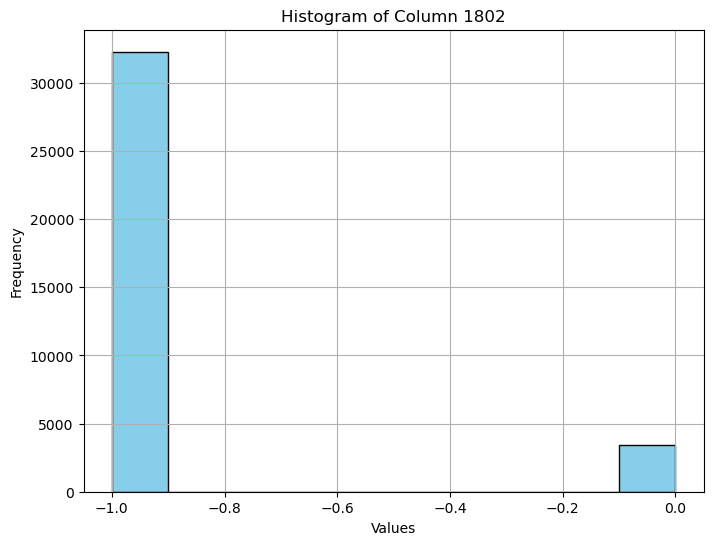

In [6]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['67'], color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Column 1802')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
# Extracting the first 64 columns as features
X_train = df.iloc[:, :64].values

# Extracting the last column as the target
y_train = df.iloc[:, -1].values

In [8]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN model (e.g., (8, 8, 1))
X_train = X_train.reshape(-1, 8, 8, 1)
# X_test = X_test.reshape(-1, 8, 8, 1)

In [13]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
894/894 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1222 - loss: -21369.9746 - val_accuracy: 0.0000e+00 - val_loss: -378075.5312
Epoch 2/50
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1261 - loss: -698897.5000 - val_accuracy: 0.0000e+00 - val_loss: -2628306.5000
Epoch 3/50
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1227 - loss: -3327257.0000 - val_accuracy: 0.0000e+00 - val_loss: -7640907.5000
Epoch 4/50
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1223 - loss: -8571691.0000 - val_accuracy: 0.0000e+00 - val_loss: -15862360.0000
Epoch 5/50
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1229 - loss: -16755561.0000 - val_accuracy: 0.0000e+00 - val_loss: -27626290.0000
Epoch 6/50
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1245 - loss: -28234362.0000 - val_accuracy: 0.0000e+00 - val_loss: -43265788.0000
Epoch 7/50
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1206 - loss: -43370820.0000 - val_accuracy: 0.0000e+00 - 

In [16]:
df_test = pd.read_csv('SVM Latest Task/test_Summer_SVM_8x8_-1_vs_0.csv')

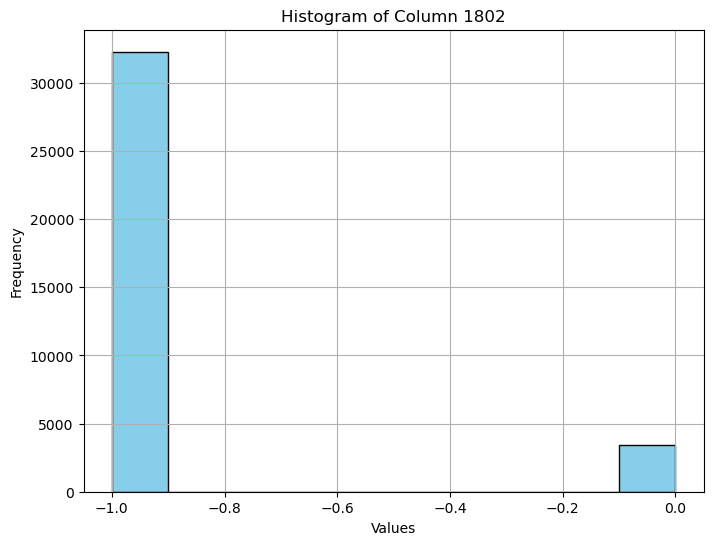

In [17]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['67'], color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Column 1802')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
# Extracting the first 64 columns as features
X_test = df.iloc[:, :64].values

# Extracting the last column as the target
y_test = df.iloc[:, -1].values

In [19]:
# Standardize the data
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
# X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN model (e.g., (8, 8, 1))
X_test = X_test.reshape(-1, 8, 8, 1)

In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict on the test data
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

1118/1118 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3220 - loss: -6687646720.0000
Test Accuracy: 0.0967
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
[[    0 32296]
 [    0  3459]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00     32296
         0.0       0.10      1.00      0.18      3459

    accuracy                           0.10     35755
   macro avg       0.05      0.50      0.09     35755
weighted avg       0.01      0.10      0.02     35755



C:\Users\kharep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kharep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kharep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
